# Manihot LIGNUM sky configuration

One of the key features of the LIGNUM model is incoming sky radiation. This is step is necessary for estimating tree photosynthesis, respiration and ultimately growth. Imcoming radiation is implemeted through the `Firmament` sub-model - please see `Firmament.h` for more details.

Here I will visualise the output sky radition in python because it is easier and prettier than C++.

In [77]:
# Import packages
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [78]:
# Import sky output csv
df = pd.read_csv("../manihot-sky/output.txt", sep=',',
                 names = ["inclination", "x", "y", "z", "radiation_intensity"])

In [79]:
# Check that the data looks somewhat reasonable
df.head(10)

,inclination,x,y,z,radiation_intensity
0,0,0.999508,0.000000,0.031376,2.28447
1,1,0.977666,0.207809,0.031376,2.28447
2,2,0.913096,0.406536,0.031376,2.28447
3,3,0.808619,0.587496,0.031376,2.28447
4,4,0.668801,0.742779,0.031376,2.28447
5,5,0.499754,0.865599,0.031376,2.28447
6,6,0.308865,0.950588,0.031376,2.28447
7,7,0.104477,0.994032,0.031376,2.28447
8,8,-0.104477,0.994032,0.031376,2.28447
9,9,-0.308865,0.950588,0.031376,2.28447


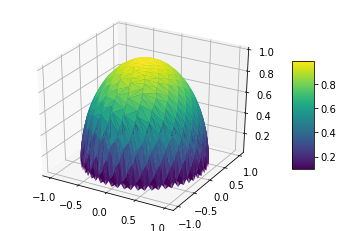

In [80]:
# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['x'], df['y'], df['z'], cmap=plt.cm.viridis, linewidth=0.01)

# Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['y'], df['x'], df['z'], cmap=plt.cm.viridis, linewidth=0.01)
fig.colorbar( surf, shrink=0.5, aspect=5)

plt.show()


In [81]:
# Well this looks okay but why don't we give ploty a go???
import plotly.graph_objects as go

In [40]:
#Assign xyz coordinates
z = df["z"]
x = df["x"]
y = df["y"]

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

[[ 0.000000e+00  2.780985e+01  4.961936e+01  8.308067e+01  1.166632e+02
   1.304140e+02  1.507206e+02  2.201871e+02  1.561536e+02  1.486416e+02
   2.037845e+02  2.060386e+02  1.071618e+02  6.836975e+01  4.533590e+01
   4.996142e+01  2.189279e+01  1.702552e+01  1.174317e+01  1.475226e+01
   1.366710e+01  5.677561e+00  3.312340e+00  1.156517e+00 -1.476620e-01]
 [ 1.000000e+00  2.771966e+01  4.855022e+01  6.521374e+01  9.527666e+01
   1.169964e+02  1.339056e+02  1.523412e+02  1.519340e+02  1.601139e+02
   1.795327e+02  1.476184e+02  1.703943e+02  1.218194e+02  5.258537e+01
   3.308871e+01  3.840972e+01  4.424843e+01  6.957860e+01  4.019351e+00
   3.050024e+00  3.039719e+00  2.996142e+00  2.967954e+00  1.999594e+00]
 [ 2.000000e+00  3.042670e+01  3.347752e+01  4.480953e+01  6.247495e+01
   7.743523e+01  1.042153e+02  1.027393e+02  1.370004e+02  1.860706e+02
   2.193173e+02  1.817615e+02  1.209154e+02  1.431835e+02  8.240501e+01
   4.847132e+01  7.471461e+01  6.009090e+01  7.073525e+00  6.0

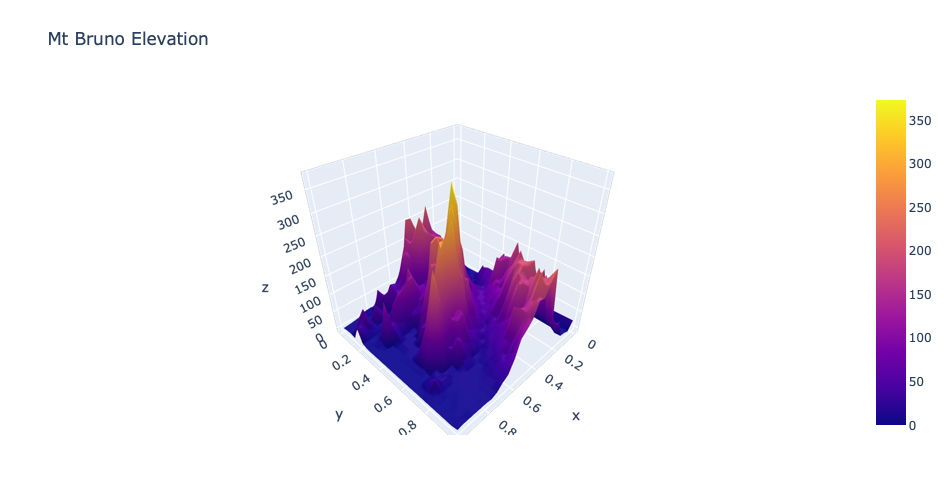

In [117]:
# Try a better plot showing radiation intensity
x = df["x"]
y = df["y"]
z = df["z"]
ri = df["radiation_intensity"]

fig = go.Figure(data=[go.Mesh3d(x=x,
                   y=y,
                   z=z,
                   opacity=0.5,
                   text=ri)])

fig.update_layout(title='LIGNUM Sky Configuration')

fig.show()